## First look at SNPs for scallop parentage panel
**20170411NL**

I need to help my collaborator find SNPs for a parentage panel. Ideally, they'd be SNPs with fairly high minor allele frequencies. And, they'd need to be flanked by regions that don't vary so we can build primers. 

I'd like to see how many candidate SNPs I can even come up with based solely on their position on the tag, and then see what their allele frequencies are. From there, I can decide if I need to include the reverse reads, which I bet I do. 

In [112]:
import matplotlib.pyplot as plt

In [91]:
cd /mnt/hgfs/SHARED_FOLDER/WorkingFolder

/mnt/hgfs/SHARED_FOLDER/WorkingFolder


In [92]:
# read in Genepop file to get header of SNP names

myfile = open("Stacks_2/batch_100.genepop", "r")

first_lines = []
for i in range(0,2):
    line = myfile.readline()
    first_lines.append(line)

In [93]:
# extract line with SNP names

SNP_line = first_lines[1]
SNP_names = SNP_line.split(",")


In [94]:
# check that it worked

print SNP_names[0:199]

['5_75', '5_84', '5_137', '6_16', '6_23', '6_24', '6_40', '6_74', '6_97', '6_112', '6_126', '6_129', '13_47', '13_51', '13_72', '13_81', '13_83', '13_86', '13_93', '16_27', '16_31', '16_45', '16_47', '16_72', '16_73', '16_95', '16_105', '16_113', '16_127', '16_134', '20_6', '20_13', '20_18', '20_26', '20_30', '20_31', '20_45', '20_52', '20_59', '20_75', '20_85', '20_90', '20_92', '20_94', '20_103', '20_137', '22_29', '22_57', '27_30', '27_44', '27_50', '27_62', '27_70', '27_115', '28_9', '28_54', '28_58', '28_128', '31_15', '31_30', '31_44', '31_65', '31_69', '35_135', '49_61', '50_8', '50_16', '50_18', '50_20', '50_34', '50_52', '50_53', '50_67', '50_69', '50_82', '50_88', '50_92', '50_94', '50_105', '50_107', '50_116', '50_117', '50_133', '57_11', '57_21', '57_22', '57_34', '57_58', '57_74', '57_83', '57_84', '57_100', '62_50', '62_64', '62_90', '62_93', '62_97', '62_98', '62_108', '62_111', '62_113', '62_137', '63_45', '63_47', '63_69', '63_76', '63_87', '63_107', '71_36', '71_63', 

In [95]:
# initiate dictionary to store RAD tag numbers as keys, 
# and positions as values in a list

SNP_dict = {}

# initiate list of SNP names
SNP_num_list = []

In [96]:
# there's a bug in the code - going to use a test SNP list
test_list = ['1_25', '1_80','2_36','2_100','3_2','3_120']

In [97]:
# loop through SNP names, parse SNP names and positions, fill dictionary

for SNP in SNP_names:# TESTING - MAKE SURE TO CHANGE BACK TO "for SNP in SNP_names:"
    name_list = SNP.split("_")
    SNP_num = int(name_list[0])
    position = int(name_list[1])
    if SNP_num not in SNP_dict:
        SNP_dict[SNP_num] = [position]
        SNP_num_list.append(SNP_num)
    else:
        position_list = SNP_dict[SNP_num]
        position_list.append(position)
        SNP_dict[SNP_num] = position_list

In [98]:
# check that it worked

print "SNP positions for 5 and 6"
print SNP_dict[5]
print SNP_dict[6]

print "\nSNP numbers"
print SNP_num_list[0:9]

SNP positions for 5 and 6
[75, 84, 137]
[16, 23, 24, 40, 74, 97, 112, 126, 129]

SNP numbers
[5, 6, 13, 16, 20, 22, 27, 28, 31]


In [9]:
# sort SNPs into list of meet criteria
# here, no SNPs in first or last 30 bases

# initiate cut off

cutoff = 30

# initiate keep and lose SNP lists

keep_SNPs_30 = []
lose_SNPs = []

for SNP in SNP_num_list:
    positions = SNP_dict[SNP]
    if all(x > cutoff for x in positions) and all(x < (139-cutoff) for x in positions):
        keep_SNPs_30.append(SNP)
    else:
        lose_SNPs.append(SNP)
        
num_kept = len(keep_SNPs_30)
num_lost = len(lose_SNPs)
total = len(keep_SNPs_30) + len(lose_SNPs)
total2 = len(SNP_num_list)

if total == total2:
    print "Filtering for RAD tags without SNPs in first or last " + str(cutoff) + " SNPs"
    print "Total: " + str(total) + " SNPs"
    print "\nKept: " + str(float(num_kept)/float(total)*100) + "%" " or " + str(num_kept) + " SNPs"
    print "Lost: " + str(float(num_lost)/float(total)*100) + "%"
else:
    "Error! You reappended to a list and now it's bologne."

Filtering for RAD tags without SNPs in first or last 30 SNPs
Total: 7740 SNPs

Kept: 5.19379844961% or 402 SNPs
Lost: 94.8062015504%


### Here is the list of RAD tag names that have SNPs that are not in the first or last 30 base pairs of the sequence:

In [10]:
print keep_SNPs_30

[13, 49, 63, 71, 196, 201, 291, 319, 337, 350, 439, 455, 473, 485, 514, 654, 802, 806, 825, 859, 899, 903, 930, 967, 976, 996, 1085, 1140, 1169, 1189, 1263, 1271, 1274, 1333, 1348, 1427, 1442, 1486, 1623, 1749, 1803, 1819, 1924, 1935, 1953, 2054, 2058, 2129, 2153, 2177, 2207, 2412, 2431, 2434, 2481, 2484, 2508, 2509, 2612, 2732, 2762, 2787, 2796, 2798, 2955, 3077, 3119, 3134, 3143, 3181, 3362, 3438, 3580, 3630, 3738, 3836, 3931, 3942, 3956, 3980, 3990, 3997, 4014, 4020, 4048, 4073, 4190, 4241, 4255, 4363, 4378, 4446, 4463, 4487, 4533, 4562, 4563, 4776, 4864, 4895, 4907, 4910, 4977, 5023, 5080, 5135, 5197, 5234, 5235, 5385, 5469, 5471, 5612, 5726, 5760, 5813, 5872, 5910, 5971, 5993, 6072, 6097, 6124, 6129, 6167, 6233, 6243, 6376, 6380, 6396, 6408, 6430, 6441, 6443, 6449, 6471, 6475, 6576, 6636, 6638, 6678, 6696, 6784, 6927, 6961, 6988, 7052, 7061, 7070, 7115, 7122, 7129, 7187, 7278, 7326, 7439, 7457, 7517, 7524, 7531, 7709, 7783, 7909, 8001, 8116, 8140, 8194, 8287, 8307, 8345, 8408, 844

In [11]:
# write these to a file, each on its own line, for use down the line

filestring = ""
for SNP in keep_SNPs_30:
    lilstring = str(SNP) + "\n"
    filestring += lilstring
print filestring[0:28]
newfile = open("SNP_names_30_cutoff.txt", "w")
newfile.write(filestring)
    

13
49
63
71
196
201
291
319



### Here is the list of RAD tag names that have SNPs that are not in the first or last 25 base pairs of the sequence:

In [12]:
# sort SNPs into list of meet criteria
# here, no SNPs in first or last 25 bases

# initiate cut off

cutoff = 25

# initiate keep and lose SNP lists

keep_SNPs = []
lose_SNPs = []

for SNP in SNP_num_list:
    positions = SNP_dict[SNP]
    if all(x > cutoff for x in positions) and all(x < (139-cutoff) for x in positions):
        keep_SNPs.append(SNP)
    else:
        lose_SNPs.append(SNP)
        
num_kept = len(keep_SNPs)
num_lost = len(lose_SNPs)
total = len(keep_SNPs) + len(lose_SNPs)
total2 = len(SNP_num_list)

if total == total2:
    print "Filtering for RAD tags without SNPs in first or last " + str(cutoff) + " SNPs"
    print "Total: " + str(total) + " SNPs"
    print "\nKept: " + str(float(num_kept)/float(total)*100) + "%" " or " + str(num_kept) + " SNPs"
    print "Lost: " + str(float(num_lost)/float(total)*100) + "%"
else:
    "Error! You reappended to a list and now it's bologne."

Filtering for RAD tags without SNPs in first or last 25 SNPs
Total: 7740 SNPs

Kept: 8.07493540052% or 625 SNPs
Lost: 91.9250645995%


## Chat with peer

**20170413**
<br>I chatted with a peer who has built multiple parentage panels for amplicon sequencing, and got some good preliminary advice. Here are somethings I learned:

* They start with a 30 bp cut off for 100 bp reads, so I think it's safe for me to start with the same. 
* If analyzing data at the SNP level, you want a minor allele frequency close to .5. If analyzing data at the haplotype level, many haplotypes can be more informative even though the minor allele frequency can be a bit lower than .5. 
* If I want to find out whether rare haplotype is actually just sequencing error/paralog, I can look at the ratio of reads. I'd expect a paralog to be evenly dispersed, like each of 4 alleles having 25% of the reads, or one having 50% and two having 25%. If sequencing error, should be really rare. Could also be worth filtering and saying keep only if haplotype appears in at least X number of individuals, or at least certain depth in an individual. Essentially, recalling genotypes in Marine's script.
* Their amplicon size ranges from 30bp to 100bp. It's okay to have a range of sizes, and I think the limit is just by the sequencing platform.
* Their distribution of minor allele frequencies ranges from .1 to .5ish.

## Now, I'd like to take the list of SNPs that made it through the 30 bp cut off, and find their minor allele frequencies

**20170417**

To do this, I need to reformat the post-filtered SNP genepop file to a transposed CSV, then retain only the rows that match the SNPs that meet the 30 bp cut off criteria. Then, I can report back the MAF frequencies.


In [13]:
cd /mnt/hgfs/SHARED_FOLDER/Git_repo/CRAGIG_run1/Scripts/reformatting/

/mnt/hgfs/SHARED_FOLDER/Git_repo/CRAGIG_run1/Scripts/reformatting


In [21]:
import numpy as np

In [14]:
!python pop_gp_to_csv_gp.py \
-i ../../../../WorkingFolder/Stacks_2/filtered_genepop_files/postMAF_postMV_asGP_20170322.gen \
-o ../../../../WorkingFolder/Stacks_2/filtered_genepop_files/transGP_snps_post_filter_20170413.csv

In [54]:
# get into numpy array
GP = open("../../../../WorkingFolder/Stacks_2/filtered_genepop_files/trans_GP_post_filter_SNPs_20170413.csv")

In [55]:
lines = GP.readlines()
GP.close()

In [56]:
array_list = []
for line in lines:
    linelist = line.strip().split(",")
    array_list.append(linelist)

In [57]:
file_array = np.array(array_list)

In [58]:
print file_array

[['sample' 'FG001' 'FG002' ..., 'Q354' 'Q355' 'Q356']
 ['5_137' '0101' '0101' ..., '0101' '0101' '0101']
 ['13_72' '0101' '0101' ..., '0101' '0104' '0404']
 ..., 
 ['24240_103' '0101' '0101' ..., '0101' '0000' '0101']
 ['24356_58' '0104' '0104' ..., '0404' '0404' '0104']
 ['24492_43' '0404' '0404' ..., '0404' '0304' '0000']]


In [59]:
# get number rows in array, aka number of SNPs in Genepop
num_rows = file_array.shape[0]

In [60]:
num_rows

15080

In [104]:
GP30_list = [] 
kept_SNP_names = []

count = 0
for i in range(1,num_rows):
    row = file_array[i,]
    snp_name = row[0]
    snp_name
    snp_name_list = snp_name.split("_")
    tag_num = int(snp_name_list[0])
    if tag_num in keep_SNPs_30:
        kept_SNP_names.append(snp_name)
        rowaslist = list(row)
        GP30_list.append(rowaslist)

In [72]:
final_list = [array_list[0]]
for lillist in GP30_list:
    final_list.append(lillist)

In [105]:
kept_SNP_names[0:9]

['13_72',
 '63_87',
 '63_107',
 '337_68',
 '350_70',
 '455_76',
 '455_82',
 '455_87',
 '485_56']

In [73]:
GP30_array = np.array(final_list)

In [74]:
# final array of just snps with 30 cut off
print GP30_array[0:9,0:9]

[['sample' 'FG001' 'FG002' 'FG003' 'FG004' 'FG005' 'FG006' 'FG007' 'FG009']
 ['13_72' '0101' '0101' '0101' '0101' '0101' '0101' '0101' '0104']
 ['63_87' '0404' '0204' '0204' '0204' '0404' '0404' '0404' '0204']
 ['63_107' '0204' '0404' '0404' '0404' '0404' '0404' '0404' '0404']
 ['337_68' '0103' '0303' '0103' '0303' '0101' '0103' '0303' '0103']
 ['350_70' '0303' '0303' '0303' '0303' '0303' '0303' '0303' '0303']
 ['455_76' '0303' '0303' '0101' '0103' '0303' '0303' '0103' '0303']
 ['455_82' '0101' '0101' '0101' '0101' '0101' '0101' '0101' '0101']
 ['455_87' '0404' '0404' '0202' '0204' '0404' '0404' '0204' '0404']]


In [82]:
# report MAF

all_maf_dict = {}

locus_list = []
for locusrow in GP30_array[1:,]: # iterate across individual genotypes within a locus
    ind_maf_dict = {} # initiate dictionary to store allele frequencies
    locus = locusrow[0]
    locus_list.append(locus)
    genlist = locusrow[1:]
    gencount = 0 # initiate counter for number of genotypes that aren't missing data
    for genotype in genlist:
        if genotype != "0000":
            gencount += 1
            allele_list = [genotype[0:2],genotype[2:4]] # assumes your genotypes are two digit format
            for allele in allele_list:
                if allele not in maf_dict:
                    ind_maf_dict[allele] = 1
                if allele in maf_dict:
                    oldcount = maf_dict[allele]
                    newcount = oldcount + 1
                    ind_maf_dict[allele] = newcount
    all_maf_dict[locus] = []
    alleles = ind_maf_dict.keys()
    num_alleles = len(alleles)
    total_count = sum(ind_maf_dict.values())
    for allele in alleles:
        count = ind_maf_dict[allele]
        maf = float(count)/float(total_count)
        maf_list = all_maf_dict[locus]
        maf_list.append(maf)
        all_maf_dict[locus] = maf_list

print all_maf_dict.values()[0:9]

[[0.0625, 0.9375], [0.00847457627118644, 0.9915254237288136], [0.0625, 0.9375], [0.0625, 0.9375], [0.0625, 0.9375], [0.00847457627118644, 0.9915254237288136], [0.00847457627118644, 0.9915254237288136], [0.0625, 0.9375], [0.0625, 0.9375]]


In [84]:
# checking to see if all biallelic

count = 0
for item in all_maf_dict.values():
    length = len(item)
    if length > 2:
        count += 1
print count

# 0 means no SNPs had more than two alleles

0


You found 8 SNPs with a MAF higher than .2


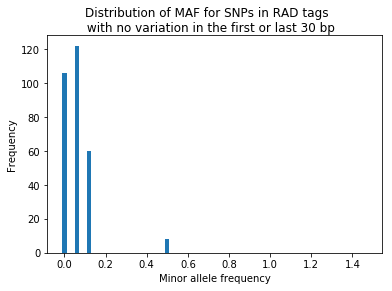

In [119]:
import matplotlib.pyplot as plt
import numpy as np

maf_list = []
count = 0

for SNP in kept_SNP_names:
    afs = all_maf_dict[SNP]
    afs.sort()
    maf_list.append(afs[0])
    if afs[0] > .2:
        count += 1
print "You found " + str(count) + " SNPs with a MAF higher than .2"

# np.arange(0,max(within_ints_rag_rd_99)+1,10)-5)
    
plt.hist(maf_list, np.arange(0,max(maf_list)+1,.02)-.01)
plt.suptitle("Distribution of MAF for SNPs in RAD tags \n with no variation in the first or last 30 bp")
plt.xlabel("Minor allele frequency")
plt.ylabel("Frequency")
plt.show()
    